<a href="https://colab.research.google.com/github/alfonsocude/MACHINE-LEARNING-1/blob/main/14-%5BTALLER%5D_Script_basico_de_una_simulacion_en_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

### ¿Qué se debe considerar en una simulación de ML?

In [42]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/alfonsocude/MACHINE-LEARNING-1/main/init.py
import init; init.init(force_download=False);  

'wget' is not recognized as an internal or external command,
operable program or batch file.


<font color='teal'>**Elementos a considerar**:</font>

- <font color=#666666>**Comprender el problema!**:</font>
- Carga de datos
- Tamaño de la base de datos
- Tipos de fuentes de información (formularios, imágenes, texto, audio, series de tiempo, etc.)
- Preprocesemanieto, segmentación, filtrado.
- Codificación de variables: 
    - Catergóricas
    - Contínuas
    - Discretas
- Limpieza, imputación.
- Estandarización de variables
- Selección/extracción de características
- Métricas de evaluación 
- Metodologías de validación: considerar tipo de problema, distribución de clases en la BD, volúmen.
- Modelos a evaluar
- Hiperparámetros de los modelos y de los algoritmos de entrenamiento.

In [43]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

Para este ejercicio vamos a usar la **Breast cancer wisconsin (diagnostic) dataset** que puede ser descargada del UCI Machine Learning Repository [link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

## Comprender Problema

La base de datos Breast Cancer Wisconsin (Diagnostic) contiene características calculadas a partir de imágenes digitalizadas de aspirados con aguja fina (FNA) de masas mamarias. Cada instancia representa una muestra tomada a pacientes, y las variables describen propiedades de los núcleos celulares presentes en la imagen, como textura, concavidad, simetría, entre otras. El objetivo principal del conjunto de datos es clasificar los tumores como benignos o malignos, basándose en estas características. Las variables relevantes fueron seleccionadas mediante una búsqueda exhaustiva, y la frontera de decisión fue construida utilizando el método MSM-T, una técnica basada en programación lineal. Esta base no contiene valores faltantes y ha sido ampliamente utilizada para evaluar modelos de clasificación en el ámbito de la medicina y el aprendizaje automático.

## Carga de Datos

In [44]:
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Tamaño de la Base de Datos

In [45]:
df.shape

(569, 31)

## Tipo de Infomación

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Preprocesemanieto, segmentación, filtrado.

### Preprocesamiento

In [47]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [48]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [49]:
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Segmentación y filtrado

In [50]:
df['target'] = df['target'].replace({'B': 0, 'M': 1})

In [51]:
malignos = df[df['target'] == 0]
benignos = df[df['target'] == 1]

## Codificación de variables

No es necesario realizar codificación de variables en este conjunto de datos debido a que todas las columnas de entrada son de tipo numérico continuo (float64), lo que permite que los algoritmos de aprendizaje automático trabajen directamente con ellas sin requerir transformaciones adicionales. Además, la variable objetivo (target), que originalmente era de tipo categórico (object), ya ha sido convertida correctamente a valores binarios (0 y 1), adecuados para tareas de clasificación. Finalmente, no existen valores faltantes en ninguna de las columnas, lo que elimina la necesidad de realizar imputaciones o ajustes adicionales que involucren codificación.

## Limpieza e imputación

In [52]:
def remove_outliers_iqr(df):
    df_clean = df.copy()
    for column in df_clean.select_dtypes(include='number').columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        filtro = (df_clean[column] >= Q1 - 1.5 * IQR) & (df_clean[column] <= Q3 + 1.5 * IQR)
        df_clean = df_clean[filtro]
    return df_clean

df= remove_outliers_iqr(df)
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.022570,0.2030,0.06552,...,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032,1
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.014990,0.1539,0.05637,...,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484,1
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.023430,0.1566,0.05708,...,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242,1
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.027380,0.1593,0.06127,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,1


## Estandarización de variables

In [53]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(columns='target')  
y = df['target']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Selección y Extraccion de las Caracteristicas

In [54]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

selected_columns = X_scaled.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_columns))

df_reducido = X_scaled[selected_columns]

df_reducido


Características seleccionadas: ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


c:\Users\nesto\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.727977,-0.771968,0.839516,0.779323,1.139599,0.134817,1.005015,1.710042,0.718326,-0.399174
1,0.387839,-0.539271,0.543570,0.247508,0.411231,1.591895,0.454587,-0.050699,1.265758,0.598084
2,-1.993130,-1.453030,-1.994518,-1.832302,0.479516,-0.773133,-0.649902,-0.382903,-0.675379,0.155578
3,-0.281286,-0.100364,-0.409853,-0.310007,-1.534308,-1.769844,-1.093987,-0.764811,-1.899830,-1.575593
4,-2.699057,-0.261170,-2.639697,-2.311396,0.325875,-0.469515,-0.868642,-1.535233,1.056835,-0.237282
...,...,...,...,...,...,...,...,...,...,...
250,-0.995019,0.930689,-0.955837,-1.030297,-0.869103,0.147891,0.095708,-0.324389,1.226089,0.435112
251,0.036548,2.394974,-0.111447,0.011586,-0.032618,-0.895162,-0.673460,-0.297650,-0.789097,-1.235619
252,0.047700,2.345786,-0.050782,0.018176,-0.072451,-0.087449,1.058957,-0.299223,-0.881658,-0.417522
253,-1.652992,2.188763,-1.630529,-1.550908,0.820938,0.043296,0.575681,0.529398,-1.267770,0.706012


# Responder

## ¿Cuál es el contexto del problema?

El cáncer de mama es uno de los tipos de cáncer más comunes y con mayor impacto en la salud de las mujeres a nivel mundial. Su detección temprana puede marcar la diferencia entre un tratamiento exitoso y uno tardío o ineficaz.

In [79]:
#@title Pregunta Abierta
#@markdown  ¿Cuál es el contexto del problema?
respuesta_1 = "El cáncer de mama es uno de los tipos de cáncer más comunes y con mayor impacto " \
"en la salud de las mujeres a nivel mundial. Su detección temprana puede marcar la diferencia " \
"entre un tratamiento exitoso y uno tardío o ineficaz." #@param {type:"string"}

## ¿Cuál es el problema que se debe resolver desde el punto de vista de Machine Learning?

El problema que se debe resolver consiste en construir un modelo de clasificación supervisada capaz de predecir si un tumor es maligno o benigno.

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Cuál es el problema que se debe resolver desde el punto de vista de Machine Learning?
respuesta_2 = "el problema que se debe resolver consiste en construir un modelo de " \
"clasificación supervisada capaz de predecir si un tumor es maligno o benigno" #@param {type:"string"}

**Características**

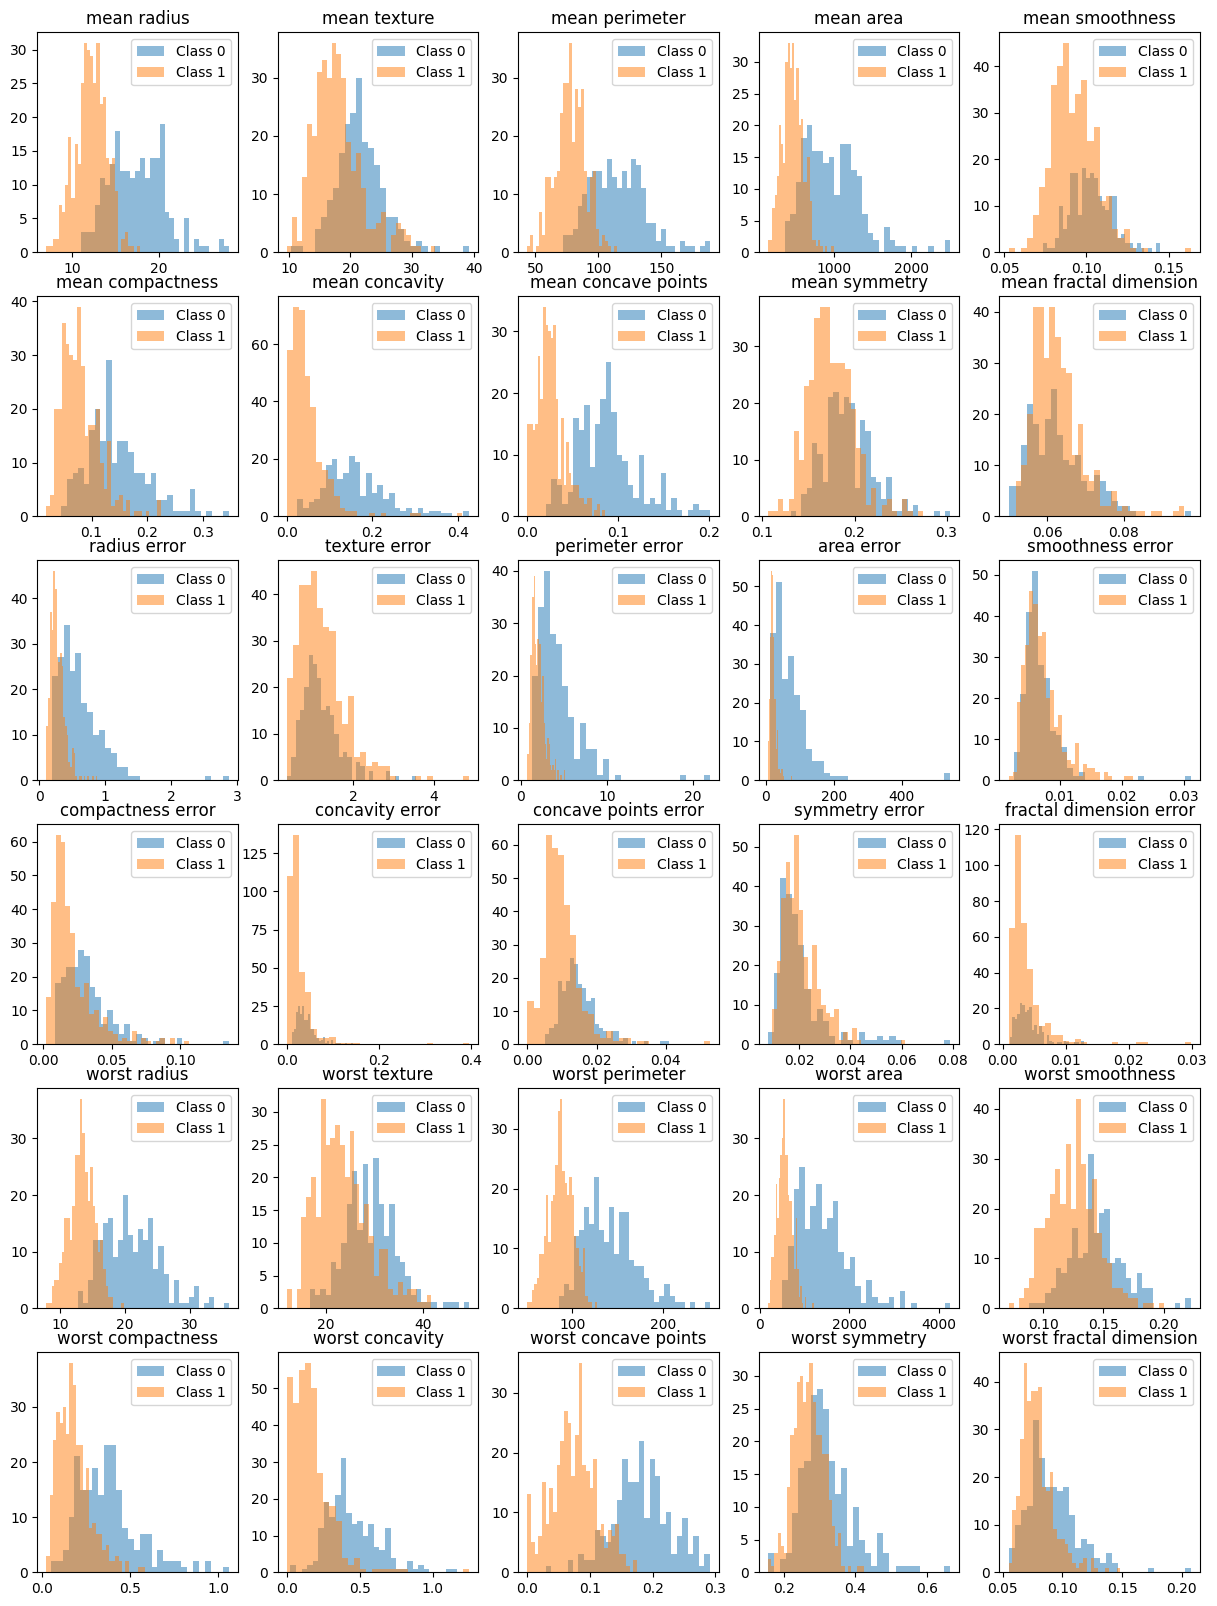

In [69]:
fig, axs = plt.subplots(6,5, figsize=(15,20))
f = 0
for i in range(6):
    for j in range(5):
        axs[i,j].hist(data.data[data.target==0,f],30,alpha=0.5, label='Class 0')
        axs[i,j].hist(data.data[data.target==1,f],30,alpha=0.5, label='Class 1')
        axs[i,j].set_title(data.feature_names[f])
        axs[i,j].legend()
        f += 1

### Metodología de Validación

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.20, random_state=42)

### Estandarización de variables

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modelo base e hiperparámetros a evaluar

In [72]:
from sklearn.neighbors import KNeighborsClassifier

[the k-nearest neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

**¿Hiperparámetros?**

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

### Métrica de evaluación

In [80]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo: {accuracy:.4f}")


Exactitud del modelo: 0.9649


### Entrenamiento y prueba

In [75]:
#Conjunto de hiperparámetros a evaluar
grid_search = [1,3,5,7,9]

#variables para almacenar los valores de las medidas de desempeño
Train_Error = []
Test_Error = []
for i in grid_search:
    #Instanciar y entrenar el mdoelo
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    
    #Estimar las medidas de desempeño
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    Train_Error.append(accuracy_score(y_train,y_pred_train))
    Test_Error.append(accuracy_score(y_test,y_pred_test))

Train_Error = np.array(Train_Error)
Test_Error = np.array(Test_Error)

### Visualización de resultados

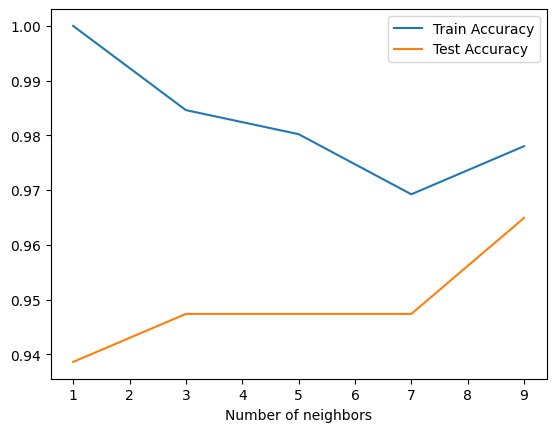

In [76]:
plt.plot(grid_search,Train_Error, label='Train Accuracy')
plt.plot(grid_search,Test_Error, label='Test Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()
plt.show()

### Responder

## ¿Cuál es el mejor valor para el hiperparámetro del modelo?

El mejor valor para el hiperparámetro n_neighbors es 9, ya que es el punto donde la exactitud del conjunto de prueba es la más alta comparado con los otros valores. Aunque la exactitud del entrenamiento disminuye al aumentar el número de vecinos, esto es esperado y deseable en cierta medida, ya que puede indicar que el modelo generaliza mejor y evita el sobreajuste.

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Cuál es el mejor valor para el hiperparámetro del modelo?
respuesta_3 = "El mejor valor para el hiperparámetro n_neighbors es 9, ya que es el punto donde " \
"la exactitud del conjunto de prueba es la más alta comparado con los otros valores. Aunque la " \
"exactitud del entrenamiento disminuye al aumentar el número de vecinos, esto es esperado y " \
"deseable en cierta medida, ya que puede indicar que el modelo generaliza mejor y evita el " \
"sobreajuste." #@param {type:"string"}

## ¿Qué es un pipeline en Machine Learning?

Es una forma de organizar los pasos de un modelo, como limpiar los datos, transformarlos y entrenar el modelo, todo en una sola estructura. Así se asegura que todo se haga en el orden correcto. Es útil para no repetir código, evitar errores y hacer que el proceso sea más fácil de probar y ajustar.

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Qué es un pipeline en Machine Learning?
respuesta_4 = "Es una forma de organizar los pasos de un modelo, como limpiar los datos, " \
"transformarlos y entrenar el modelo, todo en una sola estructura. Así se asegura que todo " \
"se haga en el orden correcto. Es útil para no repetir código, evitar errores y hacer que el " \
"proceso sea más fácil de probar y ajustar." #@param {type:"string"}